In [1]:
import sympy
from sympy import S, solve, Matrix, diff, plot, simplify, factor
from sympy import log as Log
from sympy import sin as Sin
from sympy import cos as Cos
from sympy.plotting import plot3d
from sympy.geometry import Point
%matplotlib inline

from sympy import solve, Symbol

## Занятие 16
## Математический анализ
## Градиент функции нескольких переменных, производная по направлению, касательная плоскость.

    
### Задание 1
Найти градиент функции $z=x^2-xy-2y^2$ в произвольной точке и в точке М(1,2). Вычислить производную  в направлении, составляющем с положительным направлением оси ОХ угол 60 градусов, в точке М(1,2). 

In [2]:
from sympy.abc import x, y

def z(x, y):
  return x**2 - x*y - 2*y**2

def grad_z(z , *var):
  return Matrix([z(*var).diff(variable) for variable in var])

print("Градиент в произвольной точке:")
grad_z(z, x, y)

Градиент в произвольной точке:


Matrix([
[ 2*x - y],
[-x - 4*y]])

In [3]:
def grad_z_point(z, var_dict):
  return grad_z(z, *var_dict.keys()).subs(var_dict)


M = Point(1, 2)
grad1 = grad_z_point(z, {x: M.x, y: M.y})

print("Градиент в точке M(1, 2):")
grad1

Градиент в точке M(1, 2):


Matrix([
[ 0],
[-9]])

Рассмотрим, к примеру, единичный вектор под углом 60 градусов к положительному направлению оси OX. Тогда его координаты будут $(\frac{1}{2};\frac{\sqrt{3}}{2})$.

In [4]:
print("Искомая производная:")
grad1.dot(Matrix((S(1)/2, sympy.sqrt(3)/2)))

Искомая производная:


-9*sqrt(3)/2

###  Задание 2.
Поверхность задана уравнением $z = \frac{x^2}{2} - y^2$. Составить уравнение касательной плоскости и нормали в точке $М(2, -1, 1)$. Изобразить на графике.

In [5]:
from sympy.abc import z
M = Point(2, -1, 1)
dictM = {x: M.x, y: M.y, z: M.z}
f = x**2/2 - y**2

fdx, fdy = [f.diff(p).subs(dictM) for p in [x, y]]
#display(fdx, fdy)

planeM = sympy.Eq(z - M.z, fdx*(x - M.x) + fdy*(y - M.y))
norm_line = sympy.Eq(sympy.Eq((x - M.x)/fdx, (y - M.y)/fdy, evaluate=False), (z - M.z)/(-1), evaluate=False)

print("Уравнение касательной плоскости:")
display(planeM)
print()
print(f"Уравнение нормали в точке M({M.x}, {M.y}, {M.z}):")
display(norm_line)

Уравнение касательной плоскости:


Eq(z - 1, 2*x + 2*y - 2)


Уравнение нормали в точке M(2, -1, 1):


Eq(Eq(x/2 - 1, y/2 + 1/2), 1 - z)

Построим на одном графике поверхность и касательную плоскость.

Eq(z, 2*x + 2*y - 1)

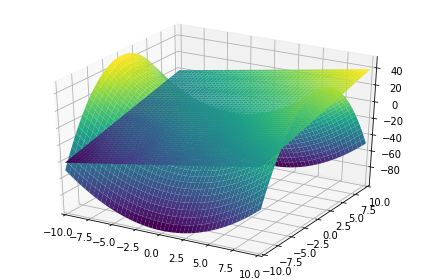

In [6]:
zz = solve(planeM, z)[0]
display(sympy.Eq(z, zz))
plot3d(zz, f)
# При желании также можно менять диапазоны, например:
# plot3d(zz, f, (x, -10, 10), (y, -10, 10))

###  Задание 3.
Поверхность задана уравнением $3xyz - z^3 = a^3$. Составить уравнение касательной плоскости и нормали к поверхности в точке $x = 0$, $y = a$. 

In [7]:
# Для начала найдём значение z, подставив значения x и y в искомое выражение.
from sympy.abc import a
F = 3*x*y*z - z**3 - a**3
z_values = solve(F.subs({x: 0, y: a}), z)
for i, cur_z in enumerate(z_values):
  display(sympy.Eq(Symbol(f"z{i}"), cur_z, evaluate=False))

Eq(z0, -a)

Eq(z1, a*(1/2 - sqrt(3)*I/2))

Eq(z2, a*(1/2 + sqrt(3)*I/2))

In [8]:
# Для z0
M = Point(0, a, z_values[0])
dictM = {x: M.x, y: M.y, z: M.z}
Fdx, Fdy, Fdz = [F.diff(p).subs(dictM) for p in [x, y, z]]
#display(Fdx, Fdy, Fdz)
planeM = sympy.Eq(Fdx*(x - M.x) + Fdy*(y - M.y) + Fdz*(z - M.z), 0)
norm_line = sympy.Eq(sympy.Eq((x - M.x)/Fdx, (y - M.y)/Fdy, evaluate=False), (z - M.z)/Fdz, evaluate=False)

print("Уравнение касательной плоскости:")
display(planeM)
print()
print(f"Уравнение нормали в точке M({M.x}, {M.y}, {M.z}):")
display(norm_line)

Уравнение касательной плоскости:


Eq(-3*a**2*x - 3*a**2*(a + z), 0)


Уравнение нормали в точке M(0, a, -a):


Eq(Eq(-x/(3*a**2), zoo*(-a + y)), -(a + z)/(3*a**2))

In [9]:
# Для z1
M = Point(0, a, z_values[1])
dictM = {x: M.x, y: M.y, z: M.z}
Fdx, Fdy, Fdz = [F.diff(p).subs(dictM) for p in [x, y, z]]
#display(Fdx, Fdy, Fdz)
planeM = sympy.Eq(Fdx*(x - M.x) + Fdy*(y - M.y) + Fdz*(z - M.z), 0)
norm_line = sympy.Eq(sympy.Eq((x - M.x)/Fdx, (y - M.y)/Fdy, evaluate=False), (z - M.z)/Fdz, evaluate=False)

print("Уравнение касательной плоскости:")
display(planeM)
print()
print(f"Уравнение нормали в точке M({M.x}, {M.y}, {M.z}):")
display(norm_line)

Уравнение касательной плоскости:


Eq(3*a**2*x*(1/2 - sqrt(3)*I/2) - 3*a**2*(1/2 - sqrt(3)*I/2)**2*(-a*(1/2 - sqrt(3)*I/2) + z), 0)


Уравнение нормали в точке M(0, a, a*(1/2 - sqrt(3)*I/2)):


Eq(Eq(x/(3*a**2*(1/2 - sqrt(3)*I/2)), zoo*(-a + y)), -(-a*(1/2 - sqrt(3)*I/2) + z)/(3*a**2*(1/2 - sqrt(3)*I/2)**2))

In [10]:
# Для z2
M = Point(0, a, z_values[2])
dictM = {x: M.x, y: M.y, z: M.z}
Fdx, Fdy, Fdz = [F.diff(p).subs(dictM) for p in [x, y, z]]
#display(Fdx, Fdy, Fdz)
planeM = sympy.Eq(Fdx*(x - M.x) + Fdy*(y - M.y) + Fdz*(z - M.z), 0)
norm_line = sympy.Eq(sympy.Eq((x - M.x)/Fdx, (y - M.y)/Fdy, evaluate=False), (z - M.z)/Fdz, evaluate=False)

print("Уравнение касательной плоскости:")
display(planeM)
print()
print(f"Уравнение нормали в точке M({M.x}, {M.y}, {M.z}):")
display(norm_line)

Уравнение касательной плоскости:


Eq(3*a**2*x*(1/2 + sqrt(3)*I/2) - 3*a**2*(1/2 + sqrt(3)*I/2)**2*(-a*(1/2 + sqrt(3)*I/2) + z), 0)


Уравнение нормали в точке M(0, a, a*(1/2 + sqrt(3)*I/2)):


Eq(Eq(x/(3*a**2*(1/2 + sqrt(3)*I/2)), zoo*(-a + y)), -(-a*(1/2 + sqrt(3)*I/2) + z)/(3*a**2*(1/2 + sqrt(3)*I/2)**2))

Рекомендуется разложить на множители левую часть уравнения касательной плоскости и затем записать ее в более простом виде, считая $a \neq 0$:

### Индивидуальное задание.
Поверхность задана уравнением $f$. Составить уравнение касательной плоскости и нормали в точке $(R\cos\alpha,R\sin\alpha,R)$.  Изобразить на графике при $R=$ значение из ИДЗ, $\alpha=$значение из ИДЗ.

$$x^{2} - 8 x + y^{2} + z^{2} = 0,\qquad R=4,\qquad\alpha=1.7 \pi$$

In [11]:
from sympy.abc import x, y, z , alpha

R = 4
alpha = 1.7 * sympy.pi

M = Point(R*Cos(alpha),R*Sin(alpha), R)
dictM = {x: M.x, y: M.y, z: M.z}
Fdx, Fdy, Fdz = [F.diff(p).subs(dictM) for p in [x, y, z]]
#display(Fdx, Fdy, Fdz)
planeM = sympy.Eq(Fdx*(x - M.x) + Fdy*(y - M.y) + Fdz*(z - M.z), 0)
norm_line = sympy.Eq(sympy.Eq((x - M.x)/Fdx, (y - M.y)/Fdy, evaluate=False), (z - M.z)/Fdz, evaluate=False)

print("Уравнение касательной плоскости:")
display(planeM)
print()
print(f"Уравнение нормали в точке M({M.x}, {M.y}, {M.z}):")
display(norm_line)

Уравнение касательной плоскости:


Eq((-12*sqrt(5) - 12)*(x - 4*sqrt(5/8 - sqrt(5)/8)) + (-48 + 12*sqrt(5/8 - sqrt(5)/8)*(-sqrt(5) - 1))*(z - 4) + 48*sqrt(5/8 - sqrt(5)/8)*(y + 1 + sqrt(5)), 0)


Уравнение нормали в точке M(4*sqrt(5/8 - sqrt(5)/8), -sqrt(5) - 1, 4):


Eq(Eq((x - 4*sqrt(5/8 - sqrt(5)/8))/(-12*sqrt(5) - 12), (y + 1 + sqrt(5))/(48*sqrt(5/8 - sqrt(5)/8))), (z - 4)/(-48 + 12*sqrt(5/8 - sqrt(5)/8)*(-sqrt(5) - 1)))

Хорасанджян Левон, вариант №157